### Bechmerk T-score: 
- show that correlation among individuals before and after the T-score computation does not change (tested via paired t-test or paired wilcoxon test)
- compare variances of genes before and after T-score computation and show also the relationship with prediction performance

Compute correlation for CARDIoGRAMplusC4D individuals

In [1]:
library(ggplot2)
library(ggpubr)
library(corrplot)
library(RColorBrewer)
library(ggrepel)
library(argparse)
library(Matrix)
library(data.table)
library(dplyr)
library(circlize)
library(ggrepel)

options(bitmapType = 'cairo', device = 'png')
Sys.setlocale("LC_NUMERIC", "C")

setwd('/psycl/g/mpsziller/lucia/CAD_UKBB/eQTL_PROJECT/')
fold_notebook <- '/psycl/g/mpsziller/lucia/castom_cad_scz/jupyter_notebook/'
out_fold <- sprintf('%sCAD_TWAS_PALAS/', fold_notebook)
tissues <- read.table('OUTPUT_GTEx/Tissue_CADgwas_final', h=F, stringsAsFactors = F)$V1
cohorts <- c("CG", "German1", "German2", "German3", "German4", "German5", "LURIC", "MG", "WTCCC")



corrplot 0.92 loaded


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


circlize version 0.4.13
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




[1] "C"

In [2]:
compute_correlations <- function(cohort_name, tissue){
gene_exp <- read.table(gzfile(sprintf('OUTPUT_GTEx/predict_CAD/%s/200kb/CAD_GWAS_bin5e-2/%s/predictedExpression.txt.gz', tissue, cohort_name)), h=T, stringsAsFactors = F)
thr_reliableGenes <- c(0.01, 0)
gene_exp <- gene_exp[!(is.na(gene_exp$dev_geno) | is.na(gene_exp$test_dev_geno)), ]
gene_exp <- gene_exp[gene_exp$dev_geno >= thr_reliableGenes[1], ]
gene_exp <- gene_exp[gene_exp$test_dev_geno > thr_reliableGenes[2], ]

tscore <- read.delim(sprintf('OUTPUT_GTEx/predict_CAD/%s/200kb/CAD_GWAS_bin5e-2/%s/devgeno0.01_testdevgeno0/predictedTscores.txt', tissue, cohort_name), h=T, stringsAsFactors = F, sep = "\t")
# adjust tscore:
tmp <- sapply(colnames(tscore)[-1], function(x) strsplit(x,'.vs.reference')[[1]][1])
tmp <- unname(tmp)
genes_tscore <- tscore[, 1]
tscore_mat <- as.matrix(tscore[, -1])
rownames(tscore_mat) <- genes_tscore
colnames(tscore_mat) <- tmp

if(!identical(gene_exp$external_gene_name, rownames(tscore_mat))){stop("different gene order!")}

# get same samples and genes for gene_exp
gene_mat <- gene_exp[, colnames(tscore_mat)]
gene_mat <- as.matrix(gene_mat)
gene_info <- gene_exp[, !colnames(gene_exp) %in% colnames(tscore_mat)]

if(ncol(gene_mat) != ncol(tscore_mat)){stop("different selection of samples!")}

# compute correlations:
cor_gene <- cor(gene_mat)
cor_tscore <- cor(tscore_mat)

return(list(gene = cor_gene, tscore = cor_tscore, gene_info = gene_info))

}


get_mat <- function(cohort_name, tissue){
    gene_exp <- read.table(gzfile(sprintf('OUTPUT_GTEx/predict_CAD/%s/200kb/CAD_GWAS_bin5e-2/%s/predictedExpression.txt.gz', tissue, cohort_name)), h=T, stringsAsFactors = F)
    thr_reliableGenes <- c(0.01, 0)
    gene_exp <- gene_exp[!(is.na(gene_exp$dev_geno) | is.na(gene_exp$test_dev_geno)), ]
    gene_exp <- gene_exp[gene_exp$dev_geno >= thr_reliableGenes[1], ]
    gene_exp <- gene_exp[gene_exp$test_dev_geno > thr_reliableGenes[2], ]

    tscore <- read.delim(sprintf('OUTPUT_GTEx/predict_CAD/%s/200kb/CAD_GWAS_bin5e-2/%s/devgeno0.01_testdevgeno0/predictedTscores.txt', tissue, cohort_name), h=T, stringsAsFactors = F, sep = "\t")
    # adjust tscore:
    tmp <- sapply(colnames(tscore)[-1], function(x) strsplit(x,'.vs.reference')[[1]][1])
    tmp <- unname(tmp)
    genes_tscore <- tscore[, 1]
    tscore_mat <- as.matrix(tscore[, -1])
    rownames(tscore_mat) <- genes_tscore
    colnames(tscore_mat) <- tmp

    if(!identical(gene_exp$external_gene_name, rownames(tscore_mat))){stop("different gene order!")}

    # get same samples and genes for gene_exp
    gene_mat <- gene_exp[, colnames(tscore_mat)]
    gene_mat <- as.matrix(gene_mat)
    gene_info <- gene_exp[, !colnames(gene_exp) %in% colnames(tscore_mat)]
    return(list(gene = gene_mat, tscore = tscore_mat, geneinfo = gene_info))
}


In [60]:
# already done! takes 234 minutes
#res <- list()
#for(i in 1:length(tissues)){
#    t <- tissues[i]
#    res[[i]] <- list()
#    for(j in 1:length(cohorts)){
#        cohort_name <- cohorts[j]
#        print(sprintf('tissue: %s, cohort: %s', t, cohort_name))
#        res[[i]][[j]] <- compute_correlations(cohort_name, t)
#    }
#    names(res[[i]]) <- cohorts
#}
#names(res) <- tissues
## save output
#fold_save <- 'OUTPUT_GTEx/predict_CAD/AllTissues/200kb/CAD_GWAS_bin5e-2/Meta_Analysis_CAD/'
#save(res, file = sprintf('%scorrelations_samples_genesANDtscores.RData', fold_save))

[1] "tissue: Adipose_Subcutaneous, cohort: CG"
[1] "tissue: Adipose_Subcutaneous, cohort: German1"
[1] "tissue: Adipose_Subcutaneous, cohort: German2"
[1] "tissue: Adipose_Subcutaneous, cohort: German3"
[1] "tissue: Adipose_Subcutaneous, cohort: German4"
[1] "tissue: Adipose_Subcutaneous, cohort: German5"
[1] "tissue: Adipose_Subcutaneous, cohort: LURIC"
[1] "tissue: Adipose_Subcutaneous, cohort: MG"
[1] "tissue: Adipose_Subcutaneous, cohort: WTCCC"
[1] "tissue: Adipose_Visceral_Omentum, cohort: CG"
[1] "tissue: Adipose_Visceral_Omentum, cohort: German1"
[1] "tissue: Adipose_Visceral_Omentum, cohort: German2"
[1] "tissue: Adipose_Visceral_Omentum, cohort: German3"
[1] "tissue: Adipose_Visceral_Omentum, cohort: German4"
[1] "tissue: Adipose_Visceral_Omentum, cohort: German5"
[1] "tissue: Adipose_Visceral_Omentum, cohort: LURIC"
[1] "tissue: Adipose_Visceral_Omentum, cohort: MG"
[1] "tissue: Adipose_Visceral_Omentum, cohort: WTCCC"
[1] "tissue: Adrenal_Gland, cohort: CG"
[1] "tissue: Adr

In [3]:
# load output:
fold_save <- 'OUTPUT_GTEx/predict_CAD/AllTissues/200kb/CAD_GWAS_bin5e-2/Meta_Analysis_CAD/'
load(sprintf('%scorrelations_samples_genesANDtscores.RData', fold_save))

In [4]:
# combine in a data frame
df <- list()
df_summary <- list()
for(i in 1:length(tissues)){
    df[[i]] <- list()
    df_summary[[i]] <- list()
    for(j in 1:length(cohorts)){
        tmp <- res[[i]][[j]]
        n <- nrow(tmp$gene)*(nrow(tmp$gene) - 1)/2
        df[[i]][[j]] <- data.frame(corr = c(tmp$gene[upper.tri(tmp$gene, diag = F)], tmp$tscore[upper.tri(tmp$tscore, diag = F)]), 
                            type = c(rep("Imputed gene expr.", n), rep("gene T-score", n)), 
                            tissue = tissues[i], 
                            cohort = cohorts[j])
        df_summary[[i]][[j]] <- data.frame(median_corr = c(median(tmp$gene[upper.tri(tmp$gene, diag = F)]), median(tmp$tscore[upper.tri(tmp$tscore, diag = F)])), 
                            q1_c = c(quantile(tmp$gene[upper.tri(tmp$gene, diag = F)], 0.25), quantile(tmp$tscore[upper.tri(tmp$tscore, diag = F)], 0.25)),
                            q3_c = c(quantile(tmp$gene[upper.tri(tmp$gene, diag = F)], 0.75), quantile(tmp$tscore[upper.tri(tmp$tscore, diag = F)], 0.75)),
                            type = c("Imputed gene expr.", "gene T-score"), 
                            tissue = tissues[i], 
                            cohort = cohorts[j])

    }
}
df_tot <- bind_rows(df)
df_tot_summary <- bind_rows(df_summary)
write.table(df_tot_summary, file = sprintf('%scorrelations_samples_genesANDtscores_summary.txt', fold_save), 
            sep = "\t", row.names = F, col.names = T, quote = F)

In [13]:
str(df_tot_summary)

'data.frame':	198 obs. of  6 variables:
 $ median_corr: num  6.57e-01 2.43e-06 6.66e-01 -2.81e-04 6.58e-01 ...
 $ q1_c       : num  0.6465 -0.0123 0.6561 -0.0125 0.648 ...
 $ q3_c       : num  0.6662 0.0123 0.6759 0.012 0.6683 ...
 $ type       : Factor w/ 2 levels "Imputed gene expr.",..: 1 2 1 2 1 2 1 2 1 2 ...
 $ tissue     : chr  "Adipose_Subcutaneous" "Adipose_Subcutaneous" "Adipose_Subcutaneous" "Adipose_Subcutaneous" ...
 $ cohort     : chr  "CG" "CG" "German1" "German1" ...


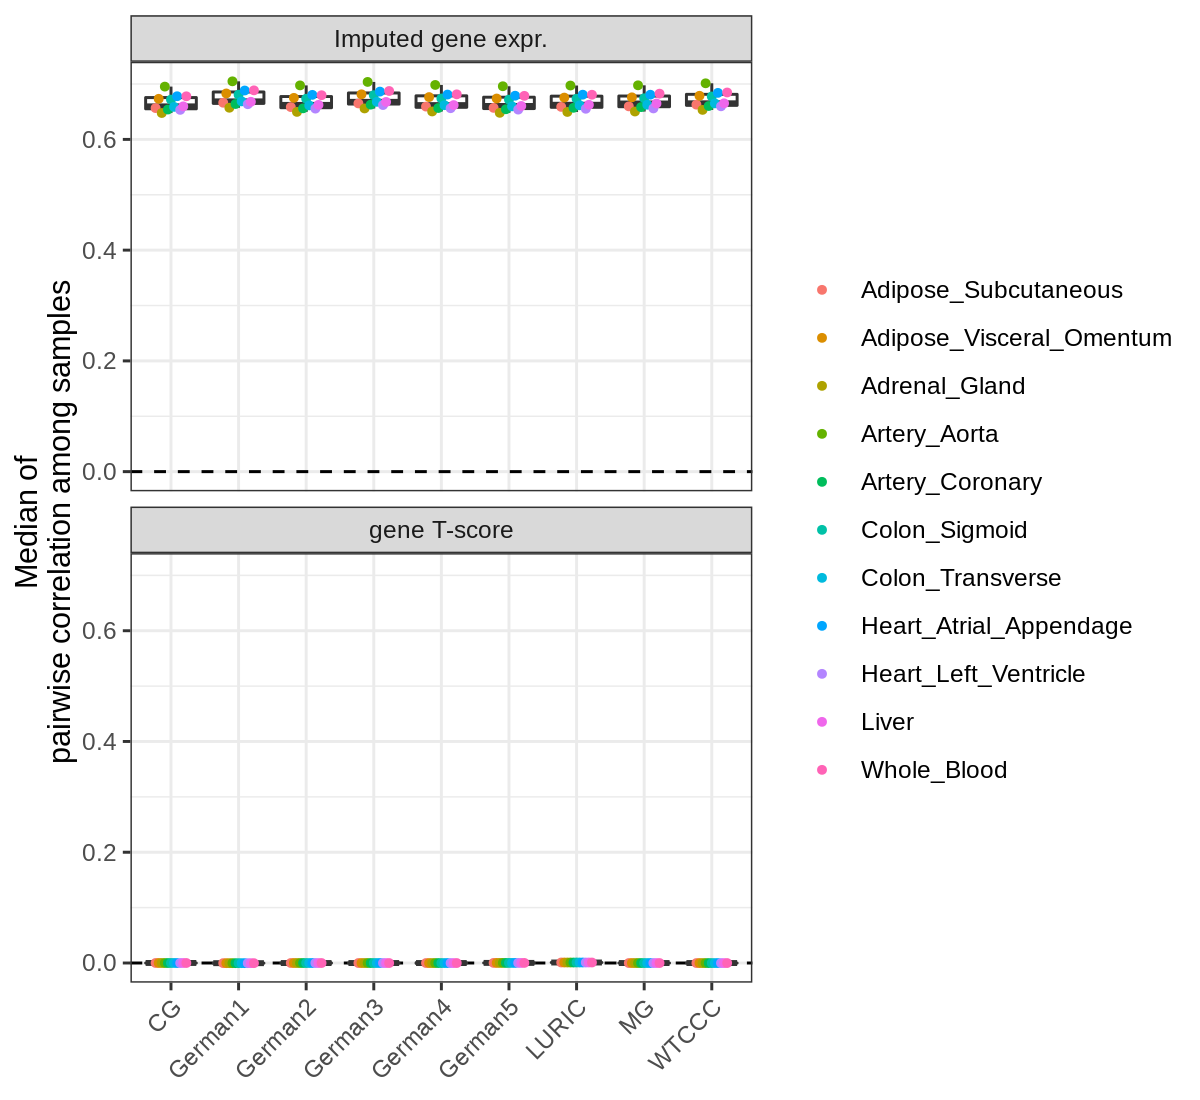

In [6]:
# from df_tot, use ggplot to make boxplots of column corr, grouping by type, use as x-axis tissue and split with facet the cohorts
options(repr.plot.width = 6, repr.plot.height = 5.5, repr.plot.res = 200)

df_tot_summary$type <- factor(df_tot_summary$type, levels = c("Imputed gene expr.", "gene T-score"))
p <- ggplot(df_tot_summary, aes(x = cohort, y = median_corr)) + 
    geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
    geom_boxplot(outlier.shape = NA, alpha = 0.2) + 
    geom_point(aes(color = tissue), position=position_dodge(width = 0.5), size = 1) + 
    # geom_errorbar(aes(ymin = q1_c, ymax = q3_c), width = 0.2, position=position_dodge(width = 1)) +
    facet_wrap(.~type, ncol = 1) + 
    theme_bw() + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1), 
         axis.title.x = element_blank(), legend.position = "right", legend.title = element_blank()) + 
    ylab("Median of\npairwise correlation among samples")
p
# save plot
ggsave(sprintf('%smedian_correlation_samples_genesANDtscores.pdf', out_fold), p, width = 6, height = 5.5)



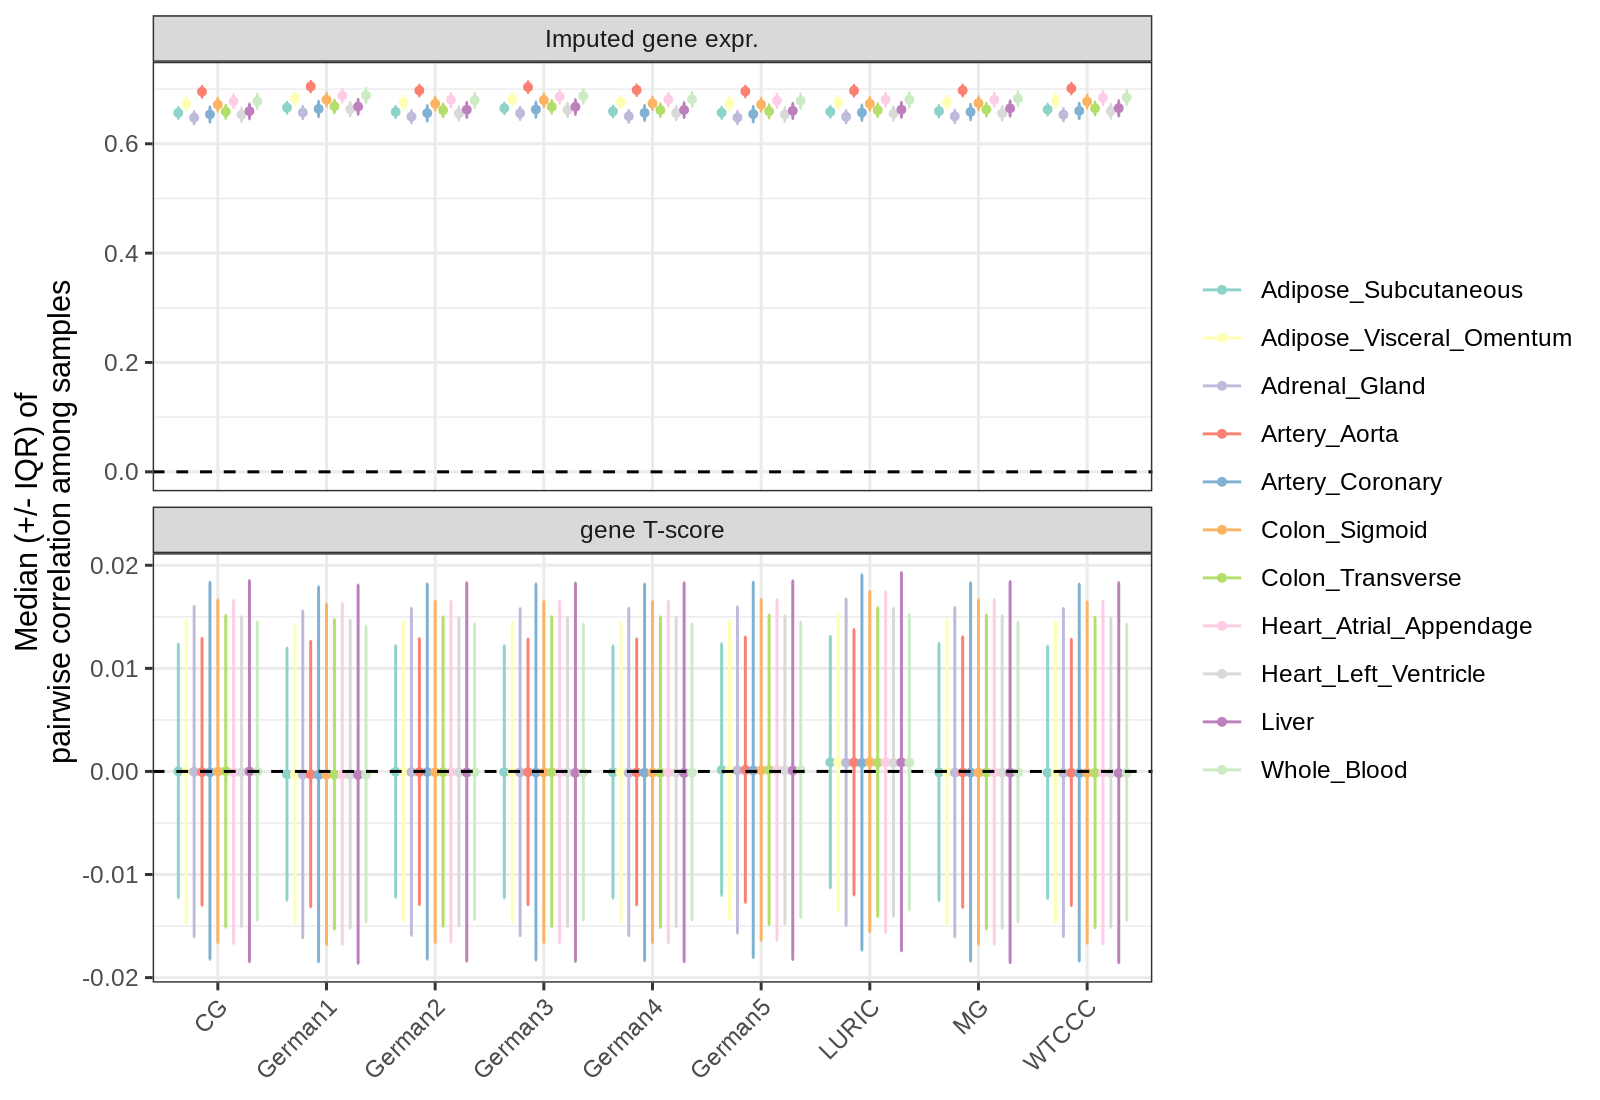

In [7]:
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)
p2 <- ggplot(df_tot_summary, aes(x = cohort, y = median_corr)) + 
    # geom_boxplot(outlier.shape = NA, alpha = 0.2) + 
    geom_point(aes(color = tissue), position=position_dodge(width = 0.8), size = 1) + 
    geom_errorbar(aes(ymin = q1_c, ymax = q3_c, color = tissue), width = 0.2, position=position_dodge(width = 0.8)) +
    geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
    facet_wrap(.~type, ncol = 1, scales = "free_y") + 
    theme_bw() + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1), 
         axis.title.x = element_blank(), legend.position = "right", legend.title = element_blank()) + 
    scale_color_brewer(palette = "Set3") +
    ylab("Median (+/- IQR) of\npairwise correlation among samples")
p2
ggsave(sprintf('%smedian_correlation_samples_genesANDtscores_v2.pdf', out_fold), p2, width = 8, height = 5.5)

### NOTE: I also tried this on a subset of samples for UKBB 
- 100 genes for Tscores, all UKBB samples   :      
```
Min.    1st Qu.     Median       Mean    3rd Qu.       Max.       NA's 
-0.5262946 -0.0938316 -0.0017497 -0.0001973  0.0917236  1.0000000          3 
```
- ~ 3000 samples from all genes in imputed gene expression:
```
Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5434  0.6448  0.6592  0.6584  0.6728  0.7450
```

In [73]:
mat_1 <- get_mat("CG", "Liver")
mat_2 <- get_mat("German1", "Liver")
mat_3 <- get_mat("German2", "Liver")
mat_7 <- get_mat("LURIC", "Liver")

cor_gene_1_2 <- apply(mat_1$gene, 2, function(x) apply(mat_2$gene, 2, function(y) cor(x, y)))
cor_tscore_1_2 <- apply(mat_1$tscore, 2, function(x) apply(mat_2$tscore, 2, function(y) cor(x, y)))

cor_gene_1_3 <- apply(mat_1$gene, 2, function(x) apply(mat_3$gene, 2, function(y) cor(x, y)))
cor_tscore_1_3 <- apply(mat_1$tscore, 2, function(x) apply(mat_3$tscore, 2, function(y) cor(x, y)))

cor_gene_1_7 <- apply(mat_1$gene, 2, function(x) apply(mat_7$gene, 2, function(y) cor(x, y)))
cor_tscore_1_7 <- apply(mat_1$tscore, 2, function(x) apply(mat_7$tscore, 2, function(y) cor(x, y)))


In [85]:
summary(as.vector(cor_gene_1_3))
summary(as.vector(cor_tscore_1_3))

summary(as.vector(cor_gene_1_7))
summary(as.vector(cor_tscore_1_7))

summary(as.vector(cor_gene_1_2))
summary(as.vector(cor_tscore_1_2))

# the correlation among cohorts follow a similar trend!

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5410  0.6468  0.6607  0.6600  0.6740  0.7515 

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-1.302e-01 -1.841e-02 -1.130e-04  3.278e-05  1.832e-02  1.486e-01 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5496  0.6469  0.6608  0.6601  0.6740  0.7438 

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-1.322e-01 -1.841e-02 -7.298e-05  5.163e-05  1.836e-02  1.400e-01 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5543  0.6496  0.6635  0.6628  0.6767  0.7463 

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-1.366e-01 -1.848e-02 -1.484e-04 -1.354e-05  1.833e-02  1.353e-01 

In [35]:
# Compute variance and mean of genes, how does it change before and after?

compute_mean_variance <- function(cohort_name, tissue_name){
    
    tmp <- get_mat(cohort_name, tissue_name)

    gene_mat <- tmp$gene
    tscore_mat <- tmp$tscore

    df_gene <- data.frame(tmp$geneinfo[,c("ensembl_gene_id", "external_gene_name", "dev_geno", "test_dev_geno")], 
                      mean = rowMeans(gene_mat), var = apply(gene_mat, 1, var), 
                      tissue = tissue_name, cohort = cohort_name, type = "Imputed gene expr.")

    df_tscore <- data.frame(tmp$geneinfo[,c("ensembl_gene_id", "external_gene_name", "dev_geno", "test_dev_geno")], 
                        mean = rowMeans(tscore_mat), var = apply(tscore_mat, 1, var), 
                        tissue = tissue_name, cohort = cohort_name, type = "gene T-score")

    df <- bind_rows(df_gene, df_tscore)

    return(df)
}

df_mean_var <- list()
for(i in 1:length(tissues)){
    t <- tissues[i]
    df_mean_var[[i]] <- list()
    for(j in 1:length(cohorts)){
        cohort_name <- cohorts[j]
        print(sprintf('tissue: %s, cohort: %s', t, cohort_name))
        df_mean_var[[i]][[j]] <- compute_mean_variance(cohort_name, t)
    }
}
df_mean_var <- bind_rows(df_mean_var)

# save output
fold_save <- 'OUTPUT_GTEx/predict_CAD/AllTissues/200kb/CAD_GWAS_bin5e-2/Meta_Analysis_CAD/'
write.table(file = sprintf('%smean_and_var_genesANDtscores.txt', fold_save), 
            df_mean_var, sep = "\t", row.names = F, col.names = T, quote = F)



[1] "tissue: Adipose_Subcutaneous, cohort: CG"
[1] "tissue: Adipose_Subcutaneous, cohort: German1"
[1] "tissue: Adipose_Subcutaneous, cohort: German2"
[1] "tissue: Adipose_Subcutaneous, cohort: German3"
[1] "tissue: Adipose_Subcutaneous, cohort: German4"
[1] "tissue: Adipose_Subcutaneous, cohort: German5"
[1] "tissue: Adipose_Subcutaneous, cohort: LURIC"
[1] "tissue: Adipose_Subcutaneous, cohort: MG"
[1] "tissue: Adipose_Subcutaneous, cohort: WTCCC"
[1] "tissue: Adipose_Visceral_Omentum, cohort: CG"
[1] "tissue: Adipose_Visceral_Omentum, cohort: German1"
[1] "tissue: Adipose_Visceral_Omentum, cohort: German2"
[1] "tissue: Adipose_Visceral_Omentum, cohort: German3"
[1] "tissue: Adipose_Visceral_Omentum, cohort: German4"
[1] "tissue: Adipose_Visceral_Omentum, cohort: German5"
[1] "tissue: Adipose_Visceral_Omentum, cohort: LURIC"
[1] "tissue: Adipose_Visceral_Omentum, cohort: MG"
[1] "tissue: Adipose_Visceral_Omentum, cohort: WTCCC"
[1] "tissue: Adrenal_Gland, cohort: CG"
[1] "tissue: Adr

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



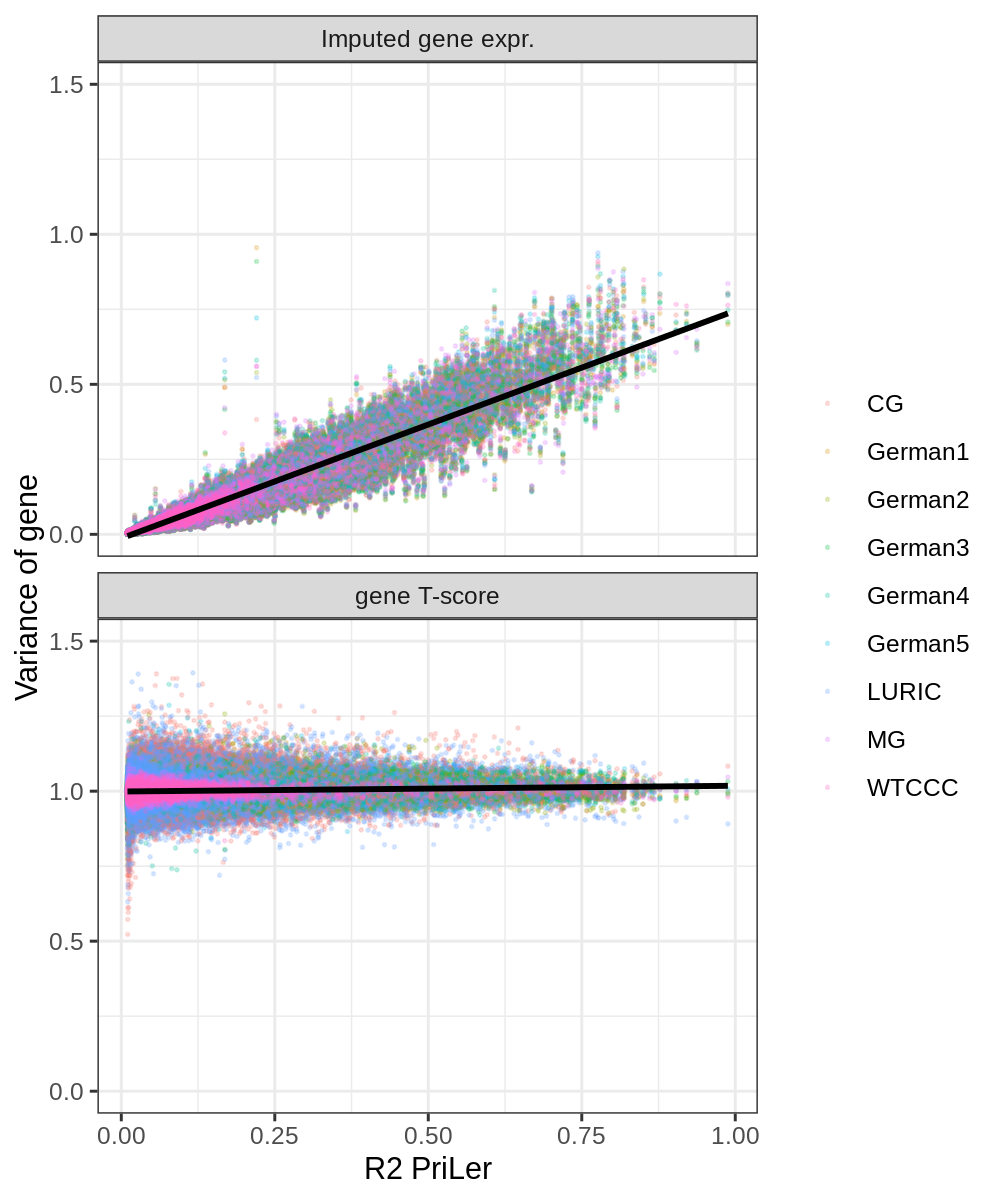

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



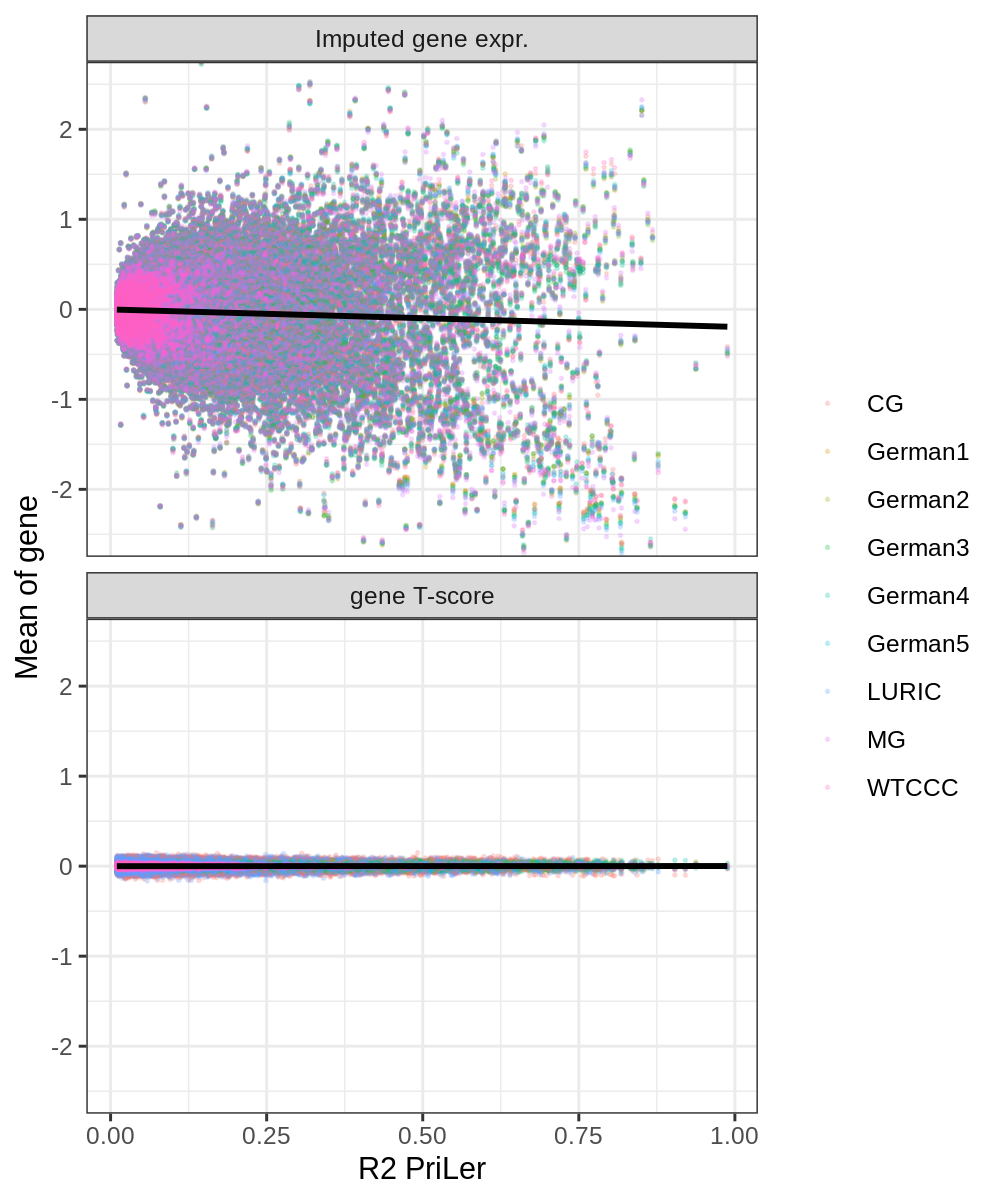

In [49]:
options(repr.plot.width = 5, repr.plot.height = 6, repr.plot.res = 200)
df_mean_var$type <- factor(df_mean_var$type, levels = c("Imputed gene expr.", "gene T-score"))

# show model performances (R2) VS variance of genes in T-score and imputed version, ideally no correlation after T-score
pl <- ggplot(df_mean_var, aes(x = dev_geno, y = var)) + 
    # geom_boxplot(outlier.shape = NA, alpha = 0.2) + 
    geom_point(aes(color = cohort), size = 0.3, alpha = 0.2) + 
    facet_wrap(.~type, ncol = 1, scales = "free_y") +  
    stat_smooth(method = "lm", se = F, color = "black") +
    theme_bw() + 
    theme(legend.position = "right", legend.title = element_blank()) + 
    ylab("Variance of gene") + 
    xlab("R2 PriLer") + 
    coord_cartesian(ylim = c(0, 1.5))
pl
ggsave(sprintf('%svar_versus_R2_genesANDtscores.pdf', out_fold), pl, width = 5, height = 6)
ggsave(sprintf('%svar_versus_R2_genesANDtscores.png', out_fold), pl, width = 5, height = 6)

pl <- ggplot(df_mean_var, aes(x = dev_geno, y = mean)) + 
    # geom_boxplot(outlier.shape = NA, alpha = 0.2) + 
    geom_point(aes(color = cohort), size = 0.3, alpha = 0.2) + 
    facet_wrap(.~type, ncol = 1, scales = "free_y") + 
    stat_smooth(method = "lm", se = F,  color = "black") +
    theme_bw() + 
    theme(legend.position = "right", legend.title = element_blank()) + 
    ylab("Mean of gene") + 
    xlab("R2 PriLer") + 
    coord_cartesian(ylim = c(-2.5, 2.5))
pl
ggsave(sprintf('%smean_versus_R2_genesANDtscores.pdf', out_fold), pl, width = 5, height = 6)
ggsave(sprintf('%smean_versus_R2_genesANDtscores.png', out_fold), pl, width = 5, height = 6)



In [51]:
cor.test(df_mean_var$dev_geno[df_mean_var$type == "Imputed gene expr."], 
        df_mean_var$mean[df_mean_var$type == "Imputed gene expr."])
cor.test(df_mean_var$dev_geno[df_mean_var$type == "gene T-score"], 
        df_mean_var$mean[df_mean_var$type == "gene T-score"]) 

cor.test(df_mean_var$dev_geno[df_mean_var$type == "Imputed gene expr."],
        df_mean_var$var[df_mean_var$type == "Imputed gene expr."])
cor.test(df_mean_var$dev_geno[df_mean_var$type == "gene T-score"],
        df_mean_var$var[df_mean_var$type == "gene T-score"])


	Pearson's product-moment correlation

data:  df_mean_var$dev_geno[df_mean_var$type == "Imputed gene expr."] and df_mean_var$mean[df_mean_var$type == "Imputed gene expr."]
t = -34.733, df = 327814, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.06396294 -0.05714163
sample estimates:
        cor 
-0.06055299 



	Pearson's product-moment correlation

data:  df_mean_var$dev_geno[df_mean_var$type == "gene T-score"] and df_mean_var$mean[df_mean_var$type == "gene T-score"]
t = 3.8038, df = 327814, p-value = 0.0001425
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.003220288 0.010066403
sample estimates:
        cor 
0.006643423 



	Pearson's product-moment correlation

data:  df_mean_var$dev_geno[df_mean_var$type == "Imputed gene expr."] and df_mean_var$var[df_mean_var$type == "Imputed gene expr."]
t = 1733.4, df = 327814, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9492034 0.9498769
sample estimates:
      cor 
0.9495413 



	Pearson's product-moment correlation

data:  df_mean_var$dev_geno[df_mean_var$type == "gene T-score"] and df_mean_var$var[df_mean_var$type == "gene T-score"]
t = 43.908, df = 327814, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.07306017 0.07986655
sample estimates:
       cor 
0.07646425 


In [54]:
table(df_mean_var$var > 1.5, df_mean_var$type)
table(df_mean_var$mean > 2.5 | df_mean_var$mean < -2.5, df_mean_var$type)

       
        Imputed gene expr. gene T-score
  FALSE             327807       327814
  TRUE                   9            2

       
        Imputed gene expr. gene T-score
  FALSE             327697       327816
  TRUE                 119            0

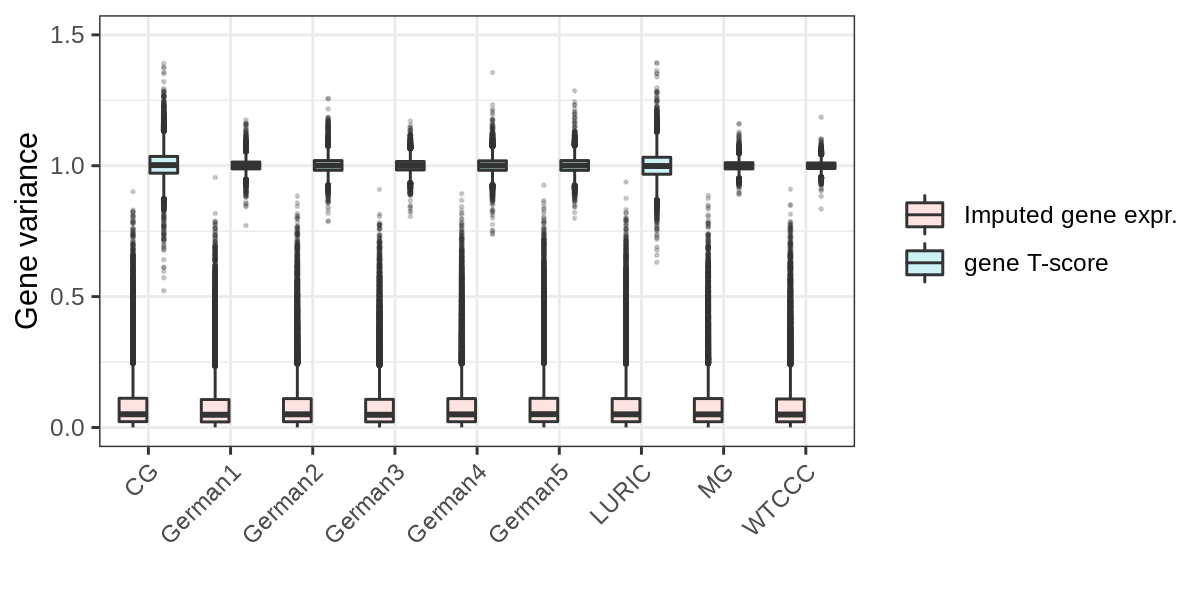

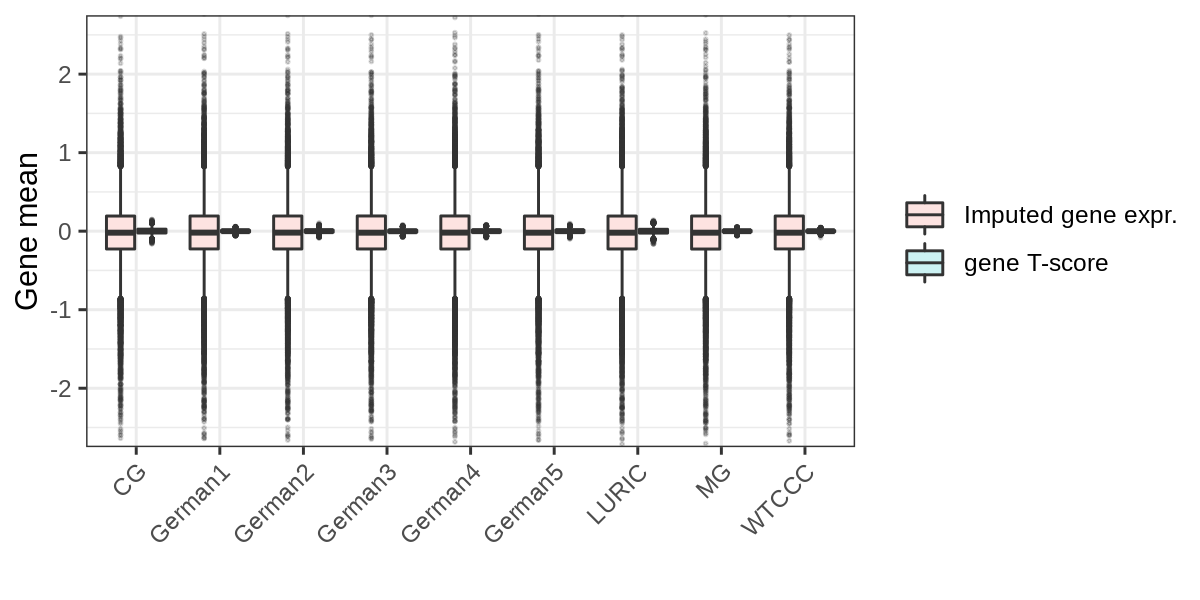

In [64]:
# Compute variance and mean of genes, how does it change before and after?
options(repr.plot.width = 6, repr.plot.height = 3, repr.plot.res = 200)

pl_box1 <- ggplot(df_mean_var, aes(x = cohort, y = var, fill = type)) + 
    geom_boxplot(alpha = 0.2, outlier.size = 0.3) + 
    theme_bw() + 
    theme(legend.position = "right", legend.title = element_blank(), 
            axis.text.x = element_text(angle = 45, hjust = 1)) + 
    ylab("Gene variance") + 
    xlab("")+
    coord_cartesian(ylim = c(0, 1.5))

pl_box1
ggsave(sprintf('%svar_genesANDtscores.pdf', out_fold), pl_box1, width = 6, height = 3)

pl_box2 <- ggplot(df_mean_var, aes(x = cohort, y = mean, fill = type)) + 
    geom_boxplot(alpha = 0.2, outlier.size = 0.3) + 
    theme_bw() + 
    theme(legend.position = "right", legend.title = element_blank(), 
            axis.text.x = element_text(angle = 45, hjust = 1)) + 
    ylab("Gene mean") + 
    xlab("") + 
    coord_cartesian(ylim = c(-2.5, 2.5))
pl_box2
ggsave(sprintf('%smean_genesANDtscores.pdf', out_fold), pl_box2, width = 6, height = 3)

In [60]:
quantile(df_mean_var$mean[df_mean_var$type == "Imputed gene expr."], 0.01)
quantile(df_mean_var$mean[df_mean_var$type == "Imputed gene expr."], 0.99)
quantile(df_mean_var$mean[df_mean_var$type == "gene T-score"], 0.01)
quantile(df_mean_var$mean[df_mean_var$type == "gene T-score"], 0.99)

1% 
-1.295423

99% 
1.056638

1% 
-0.06302926

99% 
0.06456268

In [62]:
mean(df_mean_var$var[df_mean_var$type == "Imputed gene expr."])
var(df_mean_var$var[df_mean_var$type == "Imputed gene expr."])
mean(df_mean_var$var[df_mean_var$type == "gene T-score"])
var(df_mean_var$var[df_mean_var$type == "gene T-score"])


[1] 0.08770866

[1] 0.01111159

[1] 1.001421

[1] 0.00108691

### Conclusion:
- The gene T-score that we proposed did not introduce any spurious correlation among samples but actually drastically reduced it. Indeed, the median of the pairwise correlation among samples and in each tissue is > 0.6 for the imputed gene expression and drastically drops at around zero after computing gene T-scores.

- In each cohort and across all tissues, we computed the mean and variance of genes across samples, before and after T-score computation. The mean of each gene now is around zero (0.01, and 0.99 quantiles are -1.30 and 1.06 versus -0.06 and 0.06). The variance got shifted from a distribution mostly between 0-1 (mean = 0.08, var = 0.01) to a distribution around 1 (mean = 1, var = 0.001). 
- Importantly, the original gene variance is highly correlated with PriLer predictive performances (as expected). The overall correlation is 0.95 and after T-score computation it reduced to almost no corr. at 0.08.

We can conclude that this transformation does not induce correlation but actually removes the ones present in the data (from genetic info). In addition, it rescales genes such that they have mean 0 and variance 1 and they are not dependent on the PriLer predictive performance anymore. In this way, the variability that goes into the pathway-score computation is always the same and not dependent on the predictive performance of the genes.

